<h1><center> Lab 3 : Text Classification</center></h1>


<center>Manish Dangi  </center>


<center>Introduction to Machine Learning </center>


<center> AIW24  </center>


<center>Muhammad Shahin </center>


<center> 10th September 2024</center>

**IMDb Movie Review Sentiment Analysis** <br>
This notebook demonstrates the process of text classification using the IMDb Movie Reviews dataset. We will train machine learning models to predict whether a review is positive or negative, using a variety of techniques and models.


##  Import Libraries
In this step, we import all the necessary libraries, including pandas for data manipulation, scikit-learn for model training, and NLTK for natural language processing tasks.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset
We load the IMDb Movie Reviews dataset, which consists of 50,000 labeled movie reviews (positive or negative). The dataset is evenly balanced between both classes.


In [9]:
df = pd.read_csv("/Users/manish/Documents/UOW/ml/labs/lab3/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration
Before proceeding, we explore the dataset to check its structure, detect any missing values, and understand the distribution of the target variable (sentiment).

**Dataset Shape:** We check the number of rows and columns. <br>
**Missing Values:** Detect any missing data. <br>
**Sentiment Distribution:** Ensure a balanced number of positive and negative reviews.

In [11]:
print(f"Dataset Shape: {df.shape}")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"Sentiment Distribution:\n{df['sentiment'].value_counts()}")

Dataset Shape: (50000, 2)
Missing Values:
review       0
sentiment    0
dtype: int64
Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Output:

The dataset contains 50,000 rows and 2 columns.
No missing values.
The sentiment column is evenly split between positive and negative reviews.


## Data Preprocessing 
We preprocess the text data for analysis by cleaning and transforming it.<br>

**Text Cleaning:** Convert all text to lowercase to ensure uniformity.
Remove common words that don’t contribute much meaning (stopwords), using the NLTK stopwords corpus.
<br>**Label Encoding:** The sentiment column is transformed into binary labels: 1 for positive and 0 for negative.

In [33]:
df['cleaned_review'] = df['review'].str.lower()
# df['cleaned_review'] = df['review']
stop_words = set(stopwords.words('english'))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#df['cleaned_review'] = df['cleaned_review']
#.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#for xgboost
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


## Train-Test Split
We split the dataset into training and test sets, using 80% of the data for training and 20% for testing.

In [16]:
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Text Vectorization
We convert the text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency). This transformation converts the raw text into a matrix of TF-IDF features.

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Training
We train different machine learning models for text classification. Each model is trained on the TF-IDF features, and then evaluated on the test data.

##### **Model Descriptions:**

**LinearSVC:** A linear Support Vector Classifier that finds a hyperplane to separate the two classes. <br>
**Logistic Regression:** A linear model that predicts probabilities of binary outcomes.<br>
**SVM:** Support Vector Machines with a linear kernel, a powerful classification algorithm.<br>
**Decision Tree (CART):** A decision tree classifier that makes splits based on features.<br>
**XGBoost:** An optimized gradient boosting classifier.<br>
**KNN:** K-Nearest Neighbors classifier that predicts a label based on the majority class among the nearest neighbors<br>

In [20]:
models = {
    'LinearSVC': LinearSVC(),
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'SVM': SVC(kernel='linear'),
    'Decision Tree (CART)': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'KNN': KNeighborsClassifier()
}


## Model Evaluation
We evaluate each model on the test dataset using several performance metrics:

**Accuracy:** Overall percentage of correct predictions. <br>
**Precision:** How many predicted positive reviews were actually positive. <br>
**Recall:** How many actual positive reviews were correctly predicted.<br>
**F1-Score:** The harmonic mean of precision and recall.<br>
**Confusion Matrix:** A matrix that shows the true positive, true negative, false positive, and false negative counts.<br>


In [22]:


# Dictionaries to store F1 scores and accuracy for each model
f1_scores = {}
accuracies = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate model performance
    print(f"\nModel: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Save the accuracy
    accuracies[name] = accuracy
    
    print("Classification Report:")
    report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)
    
    # Store F1 scores for both Negative and Positive classes
    f1_scores[name] = [report['Negative']['f1-score'], report['Positive']['f1-score']]
    
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training LinearSVC...

Model: LinearSVC
Accuracy: 0.8943
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89      4961
    Positive       0.89      0.90      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4395  566]
 [ 491 4548]]

Training Logistic Regression...

Model: Logistic Regression
Accuracy: 0.8961
Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      4961
    Positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[4370  591]
 [ 448 4591]]

Training SVM...

Model: SVM
Accuracy: 0.8953
Classification Report:
     

## Comparison

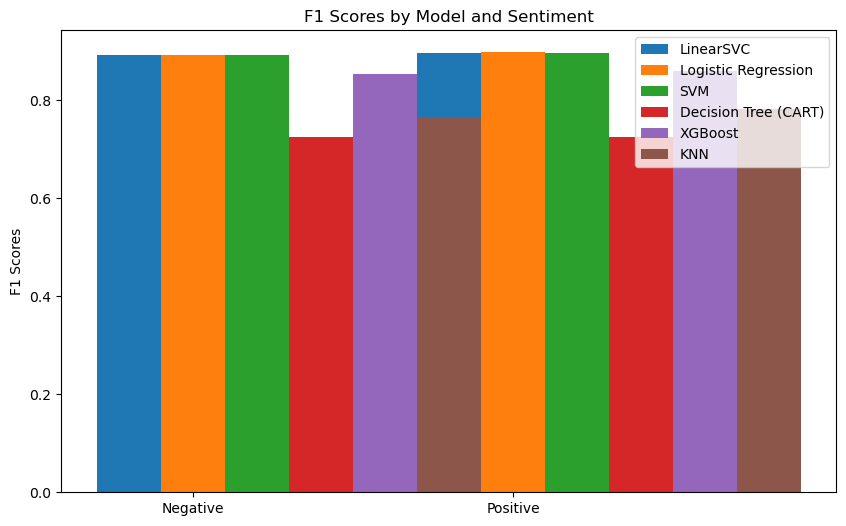

In [24]:
# Plot F1 scores for each model
labels = ['Negative', 'Positive']
x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

# Plot the F1 scores
fig, ax = plt.subplots(figsize=(10, 6))
for i, (model_name, scores) in enumerate(f1_scores.items()):
    ax.bar(x + i * width, scores, width, label=model_name)

# Add labels, title, and x-axis tick labels
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores by Model and Sentiment')u-
    
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Display the chart
plt.show()


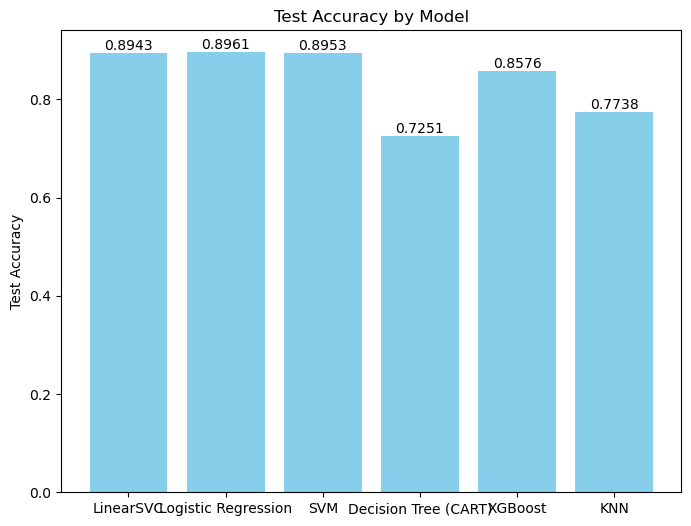

In [28]:
# Plot the test accuracy for each model
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(model_names, accuracy_values, color='skyblue')

# Add labels and title
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy by Model')

# Print accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                             # Y position (top of the bar)
        f'{height:.4f}',                    # The text (accuracy score)
        ha='center', va='bottom'            # Horizontal and vertical alignment
    )

# Display the accuracy chart
plt.show()


## Conclusion
After training and evaluating various models, we can compare their performance. Based on accuracy and other metrics like F1-score, we determine logistic regression performs the best for IMDb movie review sentiment classification.

**Further steps** can include:

Hyperparameter tuning of the models.
Experimenting with different feature engineering techniques like n-grams.
Using more advanced deep learning models such as LSTM or BERT for better performance.
